<span style="font-size: 14pt">Домашнее задание №8 </span>

<span style="color: red; font-size: 14pt">Deadline: 20.05.2017 23:59:59</span>

<span style="font-size: 10pt">ФИВТ, АПТ, Курс по машинному обучению, Весна 2017, Модуль Unspervised Learning, </span>

<span style="color:blue; font-size: 10pt">Alexey Romanenko, </span>
<span style="color:blue; font-size: 10pt; font-family: 'Verdana'">alexromsput@gmail.com</span>


<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Воронцов К. В. Математические методы обучения по прецедентам. 2012. http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf (разделы 5.2 и 7.1)
- Hastie T., Tibshirani R., Friedman J. The Elements of Statistical Learning. Springer: Data Mining, Inference, and Prediction.  — 2nd ed. — Springer-Verlag. 2009. — 746 p.http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf (глава 14)



**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_fall 496 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2017_496_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Дедлайн жесткий, в том числе помтоу что это ДЗ последнее в курсе. 

<h1 align="center">Контрольные вопросы (0 % - для самоконтроля) </h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: В чём заключается проблема мультиколлинеарности?

**Вопрос 2**: Какие проблемы при обучении алгоритмов возникают из-за большой разамерности пространства признаков?

**Вопрос 3**: В чем суть проклятия размерности?

** Вопрос 4**: Какая связь между решением задачи PCA и SVD-разложение матрицы регрессии?

** Вопрос 5**: Почему в tSNE расстояние между парамми объектов измеряется "по-стьюденту" и как это помогает решить проблему "скрученности" (crowding problem)?

**Вопрос 6**: На какой идее базируются алгоритмы аггломеративной кластеризации? Напишите формулу Ланса-Вильма

**Вопрос 7**: Какие два шага выделяют в алгоритме кластеризации k-means?

**Вопрос 8**: В чём отличия (основные упрощения) k-means от EM-алгоритма кластеризации?

** Вопрос 9 **Какой принцип работы графовых алгоритмов кластеризации?

** Вопрос 10 **  В чем некорректность постановки задачи кластеризации?

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center">Вопросы по теории (30%) </h1> 

** Задача 1 ** 
Ответьте на вопросы:

 1) Как можно не прибегая к визуализации понять, что кластерная структура у данного облака точек отсутствует?
 

 
 2) Какие из алгоритмов кластеризации могут выделять кластеры с ленточной структурой? 
 3) Какие алгоритмы кластеризации чувствительны к шуму и перемычкам?
 4) Каким образом приближают «центр кластера» в нелинейных пространствах?
 5) Каким образом можно определять число кластеров?
 
** Задача 2 **
Даны пять точек на числовой оси $X = (1; 5; 7; 8; 8)$, число кластеров равно 2. Рассчитайте ответ алгоритма  K-means (финальные центры кластеров), если начальные центры кластеров c1 = 1, c2 = 10.

** Задача 3 **
Докажите, что the k-means всегда сходится.

** Задача 4 **
Для сжатия размерности пространства алгоритм PCA применяется датасету с количеством признаков $D = 100$. Наблюдается следующий спектр собственных значений матрицы объектов-признаков. 
<img src="PCA_lambda.png" width="600">
Ответье на вопросы

* 1) Высокая ли эффективная размерность пространства признаков (intrinsic dimensionality) (насколько она близка к 100)?
* 2) Можно ли перевести датасет с помощью PCA в пространство меньшей размерности с минимальными потерями точности? Если да, то чему примерно будет равна размернось 

<h2 align="center">Практическое задание 1 (30%) </h2>
Реализуйте PCA

In [53]:
import numpy as np
import pylab as plt
'''
Performs the Principal Coponent analysis of the Matrix F
Matrix must be n * l dimensions
where n is # features
l is # samples
'''

def PCA(F, varRetained = 0.95, show = False):
    # Input
    #     F - initaial matrix 
    # Compute Covariance Matrix Sigma
    # Input
    (n, l) = F.shape
    Sigma = 1.0 / l * np.dot(F,np.transpose(F))
    # Compute eigenvectors and eigenvalues of Sigma by SVD
    # U, V - matrix, d - array: Sigma = U * np.diag(d) * V
    U, d, V = np.linalg.svd(Sigma)

    # compute the value m: number of minumum features that retains the given variance varRetaine
    dTot = np.sum(d)
    var_i = np.array([np.sum(d[: i + 1]) / \
                dTot * 100.0 for i in range(n)])
    m = np.argmax(var_i > varRetained*100)
    print '%.2f %% variance retained in %i dimensions' %(var_i[m], m) #верните число m и точность, которая достигается при этом числе главных компонент

    # plot the variance plot
    if show:
        plt.plot(var_i)
        plt.xlabel('Number of Features')
        plt.ylabel(' Percentage Variance retained')
        plt.title('PCA $\% \sigma^2 $ vs # features')
        plt.show()

    #compute the reduced dimensional features by projection
    U_reduced = U[:m]
    G = np.dot(U_reduced, F)

    return G, U_reduced

In [54]:
# Примените алгоритм к данным MNIST
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7)

Performing PCA - Principal COmponent Analysis
95.25 % variance retained in 15 dimensions


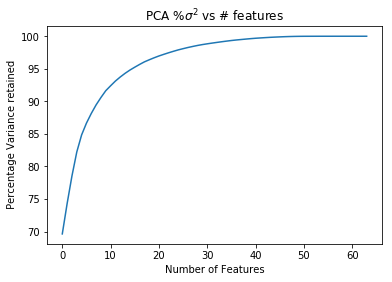

In [55]:
#################################################################
# PCA of training set
print 'Performing PCA - Principal COmponent Analysis'

Z, U_reduced = PCA(X.T, varRetained = 0.95, show = True)

In [56]:
print Z
print U_reduced

[[  0.00000000e+00   1.00000000e+01   1.60000000e+01 ...,   6.00000000e+00
    1.20000000e+01   1.20000000e+01]
 [ -4.12262764e+00  -9.14308288e+00  -1.14155172e+01 ...,  -6.80163079e+00
   -5.68822182e+00  -5.65268685e+00]
 [ -4.14452856e+00   2.70430933e+00  -3.50320421e+00 ...,   4.67505995e-01
   -9.01156327e+00  -2.37711035e+00]
 ..., 
 [  7.76751944e+00  -5.53596107e+00   2.47524920e+00 ...,   7.79765516e+00
    5.95355820e+00   9.61797858e+00]
 [  8.96452321e+00  -1.08464694e-02   4.39337199e+00 ...,   3.12804013e+00
    8.72666154e+00   7.41659784e+00]
 [ -1.05451907e+00   1.97774069e+00   5.97688068e-01 ...,  -3.26128021e+00
   -1.64759809e+00  -3.31361018e+00]]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.

<h1 align="center"><h2 align="center">Практическое задание 2 (40%) </h2> </h1>

<h2 align="left">Изучение алгоритмов кластеризации на разных выборках</h2>

### Кластеризация цифр с помощью dbscan
На данных из sklearn.datasets.load_digits примените алгоритмы кластеризации (знания о метках классов при кластеризации использовать нельзя):
 - <a href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN'>dbscan </a> 
 запускайте при различных параметрах eps и minsamples, для всех экспериментов можете выбрать одну метрику (вспомните семинар про  метрические алгоритмы);
 - Используя метки классов цифр, оцените качество различных кластеризаций при помощи Adjusted Mutual Information и Adjusted Rand Index. 
 - визуалируйте изображения тех цифр, которые соответствуют core_points;
 - визуалируйте изображения тех цифр, которые соответствуют выбросам;
 - сделайте выводы и применимости алгоритмов.

### Уменьшение палитры изображения
 - для <a href="https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg"> картинки </a> 
нужно уменьшить число цветов в палитре; для этого нужно выделить кластеры в пространстве RGB, объекты соответствуют пикселам изображения; после выделения кластеров,
все пикселы, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру. 
 - Попробуйте различные алгоритмы кластеризации:
        -- KMeans
        -- MeanShift
        -- AgglomerativeClustering
   Рассмотрите число кластеров K = 2, 3, 10, 20
 - Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи
метрики <a href="http://scikit-image.org/docs/dev/api/skimage.measure.html"> SSIM</a>. Какой способ оказался лучшим?

In [91]:
import sklearn
X, y = sklearn.datasets.load_digits(return_X_y=True)

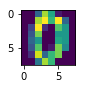

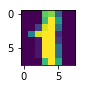

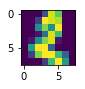

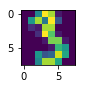

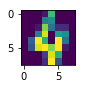

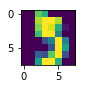

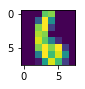

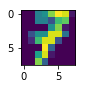

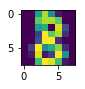

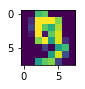

In [92]:
for i in range(10):
    plt.figure(figsize=(1, 1))
    plt.imshow(X[i,:].reshape(8, 8))
    plt.show()

# PCA

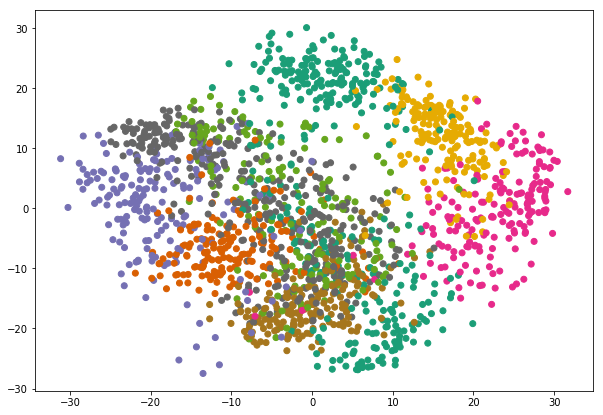

In [93]:
from sklearn.decomposition import *
from sklearn.cluster import *
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
clusters_pca = sklearn.cluster.DBSCAN().fit(X_pca)
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Dark2)
plt.show()

# TSNE

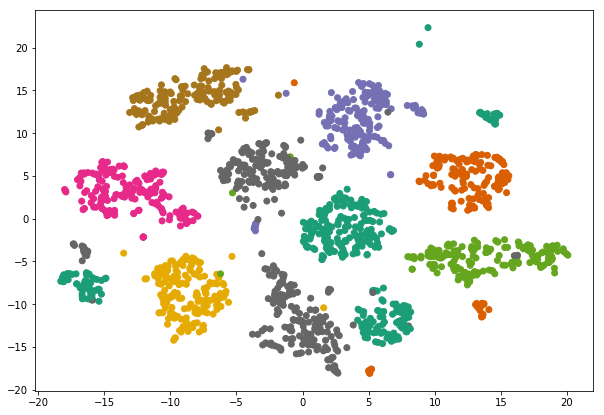

In [94]:
from sklearn.manifold import *
tsne = TSNE(n_components=2, n_iter=500)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.Dark2)
plt.show()